In [11]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [12]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:11<00:00, 168MB/s]
100% 1.06G/1.06G [00:11<00:00, 97.3MB/s]


In [13]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [23]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D,Flatten, BatchNormalization, Dropout

In [15]:
#using generators for training data and validation data
train_ds=keras .utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)

)

test_ds=keras .utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [16]:
#normalise the numpy array of images we got above
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label
train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [24]:
#creating cnn model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [26]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 71s 106ms/step - loss: 1.0615 - accuracy: 0.6058 - val_loss: 0.6158 - val_accuracy: 0.6564
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5484 - accuracy: 0.7228 - val_loss: 0.5342 - val_accuracy: 0.7166
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4828 - accuracy: 0.7704 - val_loss: 0.4794 - val_accuracy: 0.7736
Epoch 4/10
625/625 [==============================] - 63s 101ms/step - loss: 0.4106 - accuracy: 0.8101 - val_loss: 0.5214 - val_accuracy: 0.7682
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3601 - accuracy: 0.8372 - val_loss: 0.6183 - val_accuracy: 0.7252
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3053 - accuracy: 0.8672 - val_loss: 0.6714 - val_accuracy: 0.7154
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2466 - accuracy: 0.8914 - val_loss: 0.7332 - val_ac

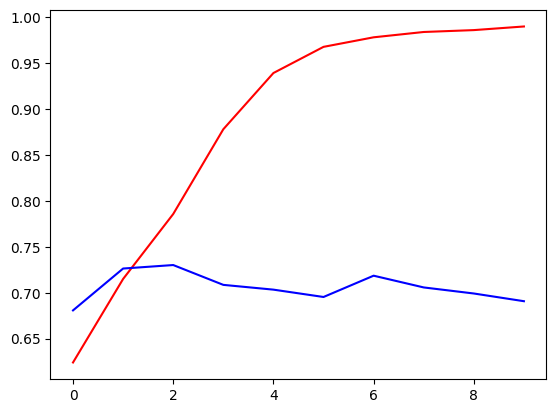

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'], color='blue',label='test')

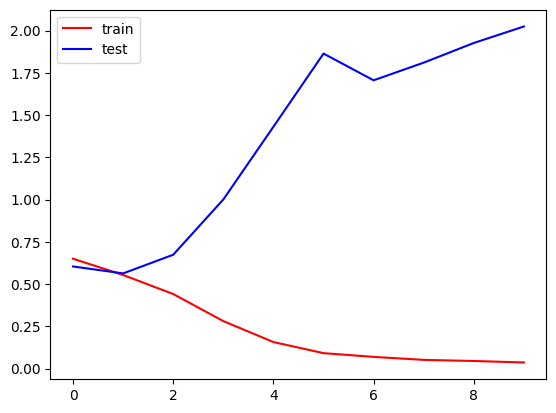

In [22]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()



#here the model is ovet fitting
#ways to reduce it is to :
#add more data
#data augmentation
#L1/L2 regularizer
#droupout
#batch norm
#reduce complexity